# Gestión riesgos de las carteras


**Desde la crisis financiera global en 2008, la gestión de riesgos se ha vuelto particularmente más importante que la gestión del rendimiento en la optimización de carteras.**

La gestión del **riesgo de cartera** es el proceso de identificar, evaluar y mitigar los diversos riesgos asociados con una cartera de inversiones.

Implica implementar estrategias para optimizar el equilibrio entre riesgo y retorno, asegurando que la cartera se alinee con los **objetivos financieros y la tolerancia al riesgo del inversor**. 

Una gestión de riesgos efectiva ayuda a minimizar las pérdidas potenciales, optimizar los retornos y mejorar el rendimiento de la inversión a largo plazo.

La gestión del riesgo de cartera es esencial para optimizar el rendimiento y proteger las inversiones.

Implica la identificación y evaluación de riesgos, la implementación de estrategias de mitigación y la monitoriazción continua.

Herramientas como el valor en riesgo, la desviación estándar y la beta son fundamentales en este proceso.

Estrategias como la diversificación y el reequilibrio ayudan a minimizar el impacto de los riesgos.

Una gestión efectiva del riesgo permite ajustes informados, contribuyendo a la estabilidad y crecimiento de la cartera a largo plazo.

### Componentes clave de la gestión del riesgo de cartera:

1. **Identificación de Riesgos:** Implica reconocer los diversos riesgos asociados con una cartera de inversiones, incluidos los relacionados con activos específicos, sectores o estrategias de inversión.

2. **Evaluación y Medición de Riesgos:** Involucra cuantificar el impacto potencial de los riesgos identificados en el desempeño de la cartera de inversiones. Este paso utiliza diversas herramientas y métricas, como el valor en riesgo (VaR), la desviación estándar y la beta.

3. **Estrategias de Mitigación de Riesgos:** Implica implementar tácticas para reducir el impacto potencial de los riesgos identificados en la cartera. Estas estrategias pueden incluir diversificación, ajustes en la asignación de activos, cobertura y reequilibrio.

4. **Monitoreo y Revisión de Riesgos:** Involucra la evaluación continua y la valoración del perfil de riesgo de la cartera y la efectividad de las estrategias de gestión de riesgos implementadas. Las revisiones regulares de la cartera ayudan a los inversores a tomar decisiones informadas y ajustar sus estrategias según sea necesario.


### Estrategias clave para la gestión del riesgo en carteras:

- **Diversificación:** Repartir inversiones en diferentes clases de activos y regiones para minimizar el impacto de riesgos específicos.
- **Asignación de Activos:** Determinar la combinación óptima de activos basada en la tolerancia al riesgo y objetivos del inversor.
- **Reequilibrio:** Ajustar la asignación de activos para mantener el nivel de riesgo deseado.
- **Cobertura:** Usar instrumentos financieros para reducir o compensar el riesgo de movimientos de precios adversos.
- **Retornos Ajustados por Riesgo:** Evaluar el rendimiento considerando el retorno y el riesgo, para tomar decisiones informadas.
- **Pruebas de Estrés y Análisis de Escenarios:** Evaluar el impacto de condiciones de mercado adversas en la cartera para identificar y ajustar vulnerabilidades.
- **Uso de Derivados y Productos Estructurados:** Emplear estos instrumentos para gestionar el riesgo, limitando las pérdidas potenciales.

Estas estrategias ayudan a optimizar el equilibrio entre riesgo y retorno, protegiendo y potenciando el valor de la cartera a largo plazo.


En este notebook vamos a analizar distintas maneras de medir el riesgo de un activo o cartera.

La medición del riesgo de un activo o cartera se enfoca en analizar las colas de la distribución de retornos, destacando los resultados extremos tanto positivos como negativos.

Este análisis permite evaluar la probabilidad e impacto de eventos de mercado inusuales, más allá de lo que indican medidas tradicionales como la volatilidad.

Al entender estos extremos, los inversores pueden diseñar estrategias de mitigación más efectivas, preparándose para escenarios de alto riesgo y protegiendo mejor sus inversiones contra sorpresas adversas.

Las principales medidas o ratios son:

- Volatilidad
- Ratio de sharpe
- VaR, CVaR, EVaR etc.
- Máximo Drawdown
- Tiempo de recuperación
- Ratio de Infomación
- Ratio de Treinor
- Ratio de Sortino
- Ratio de Calmar
- Bull Beta
- Bear Beta


Hagamos un breve repaso de algunos conceptos que hemos visto anteriormente en el curso usando datos reales:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm
from scipy.linalg import sqrtm
import yfinance as yf
import cvxpy as cp
import riskfolio as rp

# print(plt.style.available) #list of available styles
plt.style.use('ggplot')

In [2]:
precios = pd.read_excel('../data/data.xlsx', header=0, index_col=0, parse_dates=True)
precios = precios.dropna()
retornos = np.log(precios).diff().dropna()
retornos.head(2)

AAPL   BTC-USD       IEF    ELE.MC      CSCO      MSFT  \
Date                                                                     
2014-09-18  0.002065 -0.074643 -0.000683  0.008327  0.000397  0.003433   
2014-09-19 -0.008187 -0.072402  0.003795  0.004727 -0.000793  0.017835   

                ORCL       IAU      TSLA       IBM      INTC  
Date                                                          
2014-09-18  0.009917  0.002533  0.009292  0.004915  0.005417  
2014-09-19 -0.043031 -0.005920 -0.017204  0.001289 -0.010002

Text(0.5, 1.0, 'Volatilidad')

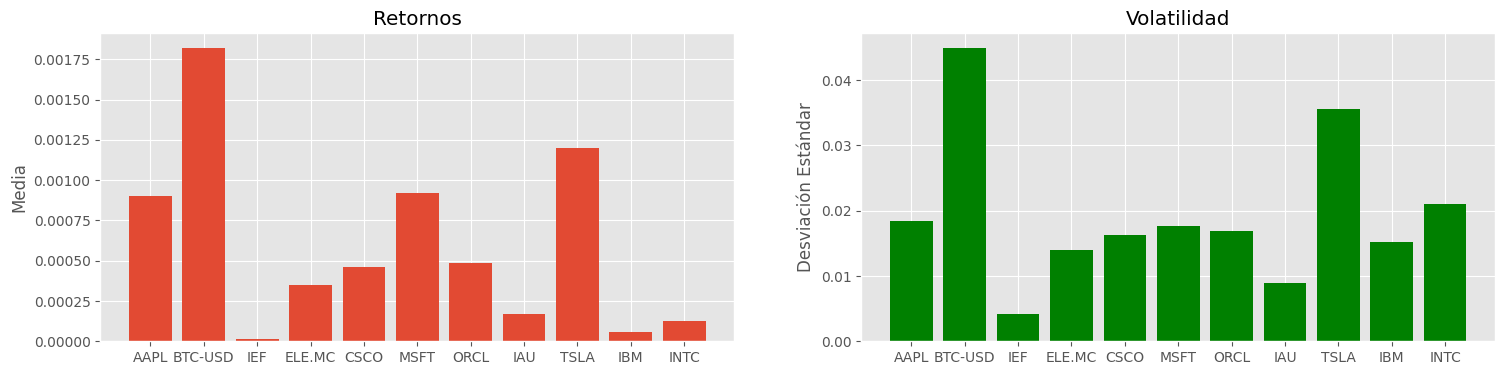

In [3]:
means = retornos.mean()
stds = retornos.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')



In [9]:
# Crear un gráfico de líneas con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['BTC-USD'], 
                         mode='lines',
                         name='BTC-USD'))

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['IEF'], 
                         mode='lines',
                         name='IEF')) #iShares 7-10 Year Treasury Bond ETF

# Añadir títulos
fig.update_layout(
    width=1500,
    height=400,
    title="COMPARACIÓN ACTIVOS CON MUCHA Y POCA VOLATILIDAD",
    title_font=dict(size=18),  # Ajusta el tamaño del título
    title_x=0.5,  # Centra el título
    yaxis_title="Retornos diarios %",
    margin=dict(l=20, r=20, b=20, t=40),  # Ajusta los márgenes para hacer los bordes más pequeños
)

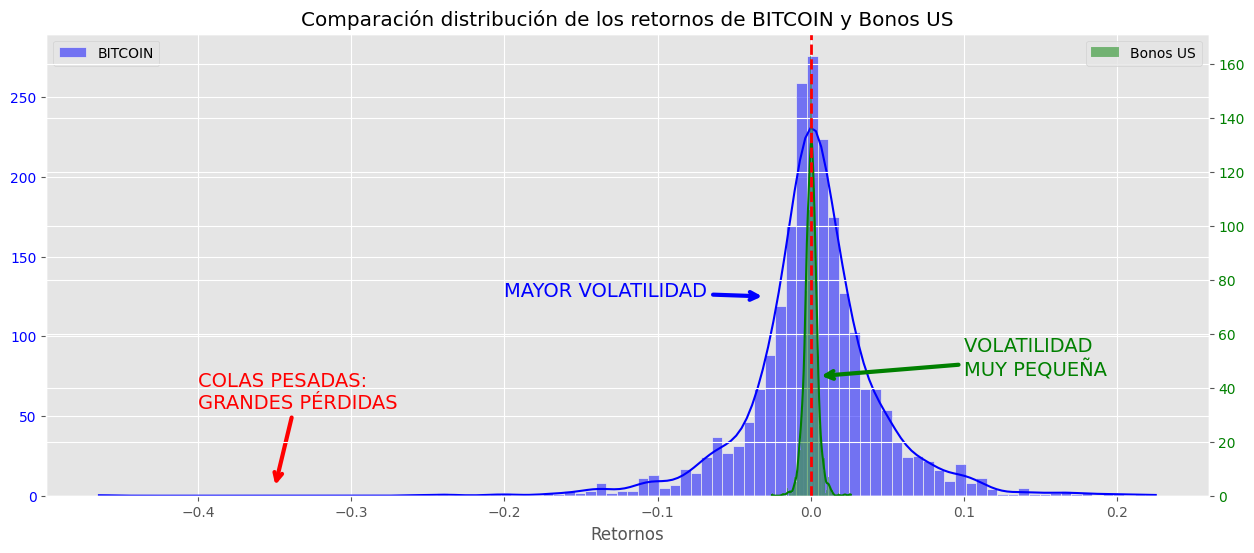

In [6]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=retornos, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=retornos, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()

**CONCLUSIÓN: LOS RETORNOS NO SIGUEN UNA DISTRIBUCIÓN NORMAL**

* Las colas de la distribución de los retornos son más pesadas que las de una distribución normal.

* Esto quiere decir que hay más probabilidad de que ocurran eventos extremos (tanto positivos como negativos) de lo que cabría esperar si los retornos siguieran una distribución normal.

* Por lo general, la cola izquierda es más pesada que la derecha, lo que quiere decir que hay más probabilidad de que ocurran eventos negativos extremos que positivos extremos.

**CONSECUENCIA: PARA ESTIMAR ADECUADAMENTE EL RIESGO, LA VOLATILIDAD NO ES SUFICIENTE**

## VaR

El Valor en Riesgo (VaR) es una medida del riesgo de mercado de un activo o una cartera de activos. Se define como la **pérdida máxima que se espera que un activo o una cartera de activos sufra en un período de tiempo determinado con un cierto nivel de confianza**.

Por ejemplo, si el VaR diario de una acción es de 10 de euros con un nivel de confianza del 95%, esto significa que el 95% de los días perderemos menos de 10 euros.

El VaR facilita la estimación de la cantidad máxima que podría perderse en el mercado, proporcionando así una base para determinar el **capital necesario para mantener la posición**.

También permite protegerse frente a grandes pérdidas por la concentración de riesgos que resultarían inaceptables.

Para calcular el VaR existen tres métodos:

* **Método paramétrico**: Se asume que los retornos siguen una distribución normal.

* **Método históricos**: Se calcula el VaR directamente a partir de los datos históricos.

* **Método de simulación**: Se simulan los retornos de la acción y se calcula el VaR a partir de los retornos simulados.

### VaR paramétrico

El **VaR paramétrico** es una técnica para estimar el riesgo de pérdida de una cartera de inversiones. Se basa en la suposición de que los rendimientos de los activos siguen una distribución normal.

**Una hipótesis importante es que las distribuciones son simétricas**.

Los pasos para calcular el VaR paramétrico son:

- Estimar μ y σ de los rendimientos.
  
- Elegir el nivel de confianza (ej. 95%).
  
- Usar ppf para obtener el valor correspondiente. La función ppf es la inversa de la Función de Distribución Acumulada (CDF) para una distribución normal. La vamos a usar para calcular el valor de la variable aleatoria bajo la distribución normal para el cual la probabilidad acumulada hasta ese punto es 1−confianza.

- Otra metodología para determinar este cálculo implica la utilización de la distribución normal estándar, donde la media (μ) es igual a 0 y la desviación estándar (σ) es 1, junto con el valor Z. Este último se puede definir como la cantidad de desviaciones estándar a las que un determinado punto se sitúa de la media. Dado que el cálculo del Valor en Riesgo (VaR) se enfoca exclusivamente en las pérdidas, adoptando así un enfoque unilateral, los valores de Z que comúnmente se emplean son:
    - 95% implica $z = 1,65$
    - 99% implica $z = 2,33$

<center>
    <img src="../imgs/var95-99.PNG"  alt="drawing" width="700">
</center>

Fuente del código de la función: [Python for Finance-4:](https://pratham1202.medium.com/python-for-finance-4-semi-deviation-var-cvar-and-cornish-fischer-modification-6200a2d66299)

In [14]:
def var_gaussian(r, level=5):
    """
    Devuelve el VaR Gaussiano Paramétrico de una Serie o DataFrame
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_gaussian, level=level)
    
    elif isinstance(r, pd.Series):
        # calcula el valor Z asumiendo que es una normal
        z = norm.ppf(level/100)
        return -(r.mean() + z*r.std())
    
    else:
        raise TypeError("Esperamos una Serie o DataFrame")

In [15]:
var_95_gauss = var_gaussian(retornos)
var_99_gauss = var_gaussian(retornos, level=1)

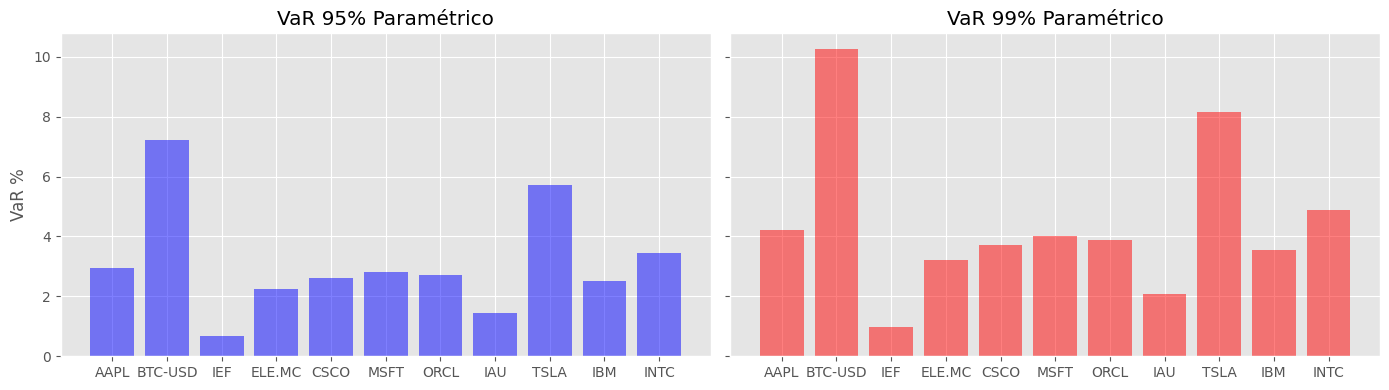

In [16]:
# Configura el tamaño de la figura y crea subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)  # 1 fila, 2 columnas, ajusta el tamaño como necesario

# Gráfica para var_95_gauss
axs[0].bar(retornos.columns, var_95_gauss*100, color='blue', alpha=0.5, label='95%')
axs[0].set_title('VaR 95% Paramétrico')  # Establece el título para el primer subplot
#axs[0].legend()  # Muestra la leyenda en el primer subplot
axs[0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_99_gauss
axs[1].bar(retornos.columns, var_99_gauss*100, color='red', alpha=0.5, label='99%')
axs[1].set_title('VaR 99% Paramétrico')  # Establece el título para el segundo subplot
#axs[1].legend()  # Muestra la leyenda en el segundo subplot

# Muestra la figura completa con ambos subplots
plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
plt.show()


### VaR Histórico

El VaR histórico implica calcular, a partir de rentabilidades pasadas, el peor retorno que se ajusta al nivel de confianza establecido.

Para calcular el VaR histórico, los pasos incluyen determinar el percentil correspondiente a $1−\text{intervalo de confianza}$ de los retornos

Fuente del código de la función: [Python for Finance-4:](https://pratham1202.medium.com/python-for-finance-4-semi-deviation-var-cvar-and-cornish-fischer-modification-6200a2d66299)

In [17]:
def var_historico(r, level=5):
    """
    Devuelve el VaR Histórica de una Serie o DataFrame
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historico, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    
    else:
        raise TypeError("Esperamos una Serie o DataFrame")

In [18]:
var_95_hist = var_historico(retornos)
var_99_hist = var_historico(retornos, level=1)

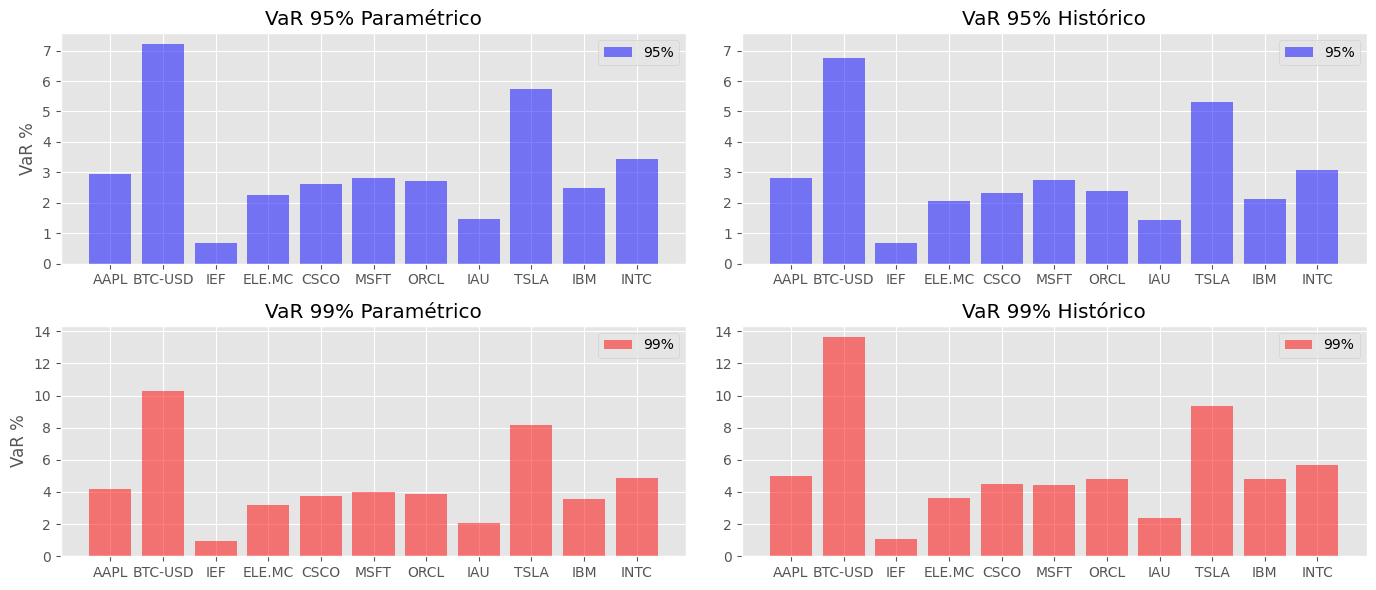

In [19]:
# Configura el tamaño de la figura y crea subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 6))  # 1 fila, 2 columnas, ajusta el tamaño como necesario

# Gráfica para var_95_gauss
axs[0, 0].bar(retornos.columns, var_95_gauss*100, color='blue', alpha=0.5, label='95%')
axs[0, 0].set_title('VaR 95% Paramétrico')  # Establece el título para el primer subplot
axs[0, 0].legend()  # Muestra la leyenda en el primer subplot
axs[0, 0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_95_hist
axs[0, 1].bar(retornos.columns, var_95_hist*100, color='blue', alpha=0.5, label='95%')
axs[0, 1].set_title('VaR 95% Histórico')  # Establece el título para el primer subplot
axs[0, 1].legend()  # Muestra la leyenda en el primer subplot

# Ajusta el eje Y de la primera fila para que coincidan
axs[0, 1].set_ylim(axs[0, 0].get_ylim())


# Gráfica para var_99_gauss
axs[1, 0].bar(retornos.columns, var_99_gauss*100, color='red', alpha=0.5, label='99%')
axs[1, 0].set_title('VaR 99% Paramétrico')  # Establece el título para el segundo subplot
axs[1, 0].legend()  # Muestra la leyenda en el segundo subplot
axs[1, 0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_99_hist
axs[1, 1].bar(retornos.columns, var_99_hist*100, color='red', alpha=0.5, label='99%')
axs[1, 1].set_title('VaR 99% Histórico')  # Establece el título para el segundo subplot
axs[1, 1].legend()  # Muestra la leyenda en el segundo subplot

# Ajusta el eje Y de la segunda fila para que coincidan
axs[1, 0].set_ylim(axs[1, 1].get_ylim())


# Muestra la figura completa con ambos subplots
plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
plt.show()

Veamos la diferencia entre **VaR Paramétrico** y **VaR Histórico** de los Bonos US, cuyos retornos se parecen bastante a una normal

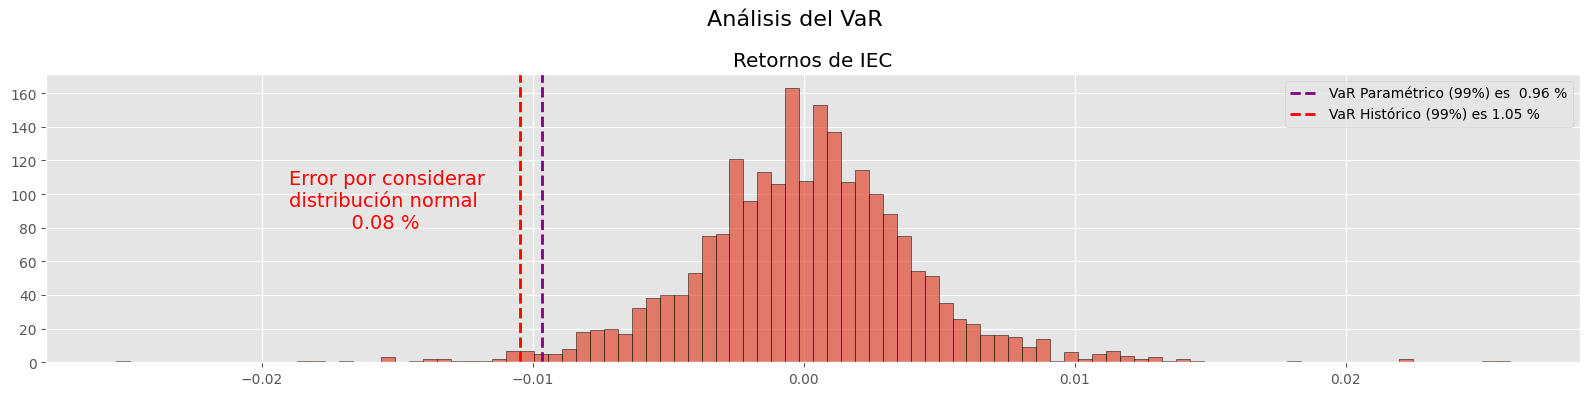

In [21]:
# 3. Hacemos la gráfica para un activo cua distribución de los retornos se parece a la normal IEF - Bonos US

fig, ax = plt.subplots(figsize=(16, 4))


ax.hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)

ax.axvline(x=-var_99_gauss['IEF'], color='purple', linestyle='--', linewidth=2, label=f"VaR Paramétrico (99%) es  {100*var_99_gauss['IEF']:.2f} %")
ax.axvline(x=-var_99_hist['IEF'], color='red', linestyle='--', linewidth=2, label=f"VaR Histórico (99%) es {100*var_99_hist['IEF']:.2f} %")
ax.text(-0.019, 80, f"Error por considerar\ndistribución normal\n          {100*(np.abs(var_99_hist['IEF']-var_99_gauss['IEF'])):.2f} %", fontsize=14, color='RED')

ax.set_ylabel('')
ax.set_title('Retornos de IEC')
ax.legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

INTERPRETACIÓN DE LA GRÁFICA:

1- El **Var Normal** es el VaR calculado usando el método paramétrico, es decir, asumiendo que los retornos siguen una distribución normal.

*  Var Normal nos dice que hay un 99% de probabilidad de que la acción pierda menos del 0.96% en un día.

2- El **Var Histórico** es el VaR calculado usando el método no paramétrico, es decir, usando los datos históricos.

* Var Histórico nos dice que hay un 99% de probabilidad de que la acción pierda menos del 1.05% en un día.

Es decir, cometemos un **error al calcular el riesgo del 0.08%** al asumir que los retornos siguen una distribución normal.

Pero, ¿qué ocurre si usamos activos cuyas distribuciones de los retornos no se parecen a una normal?

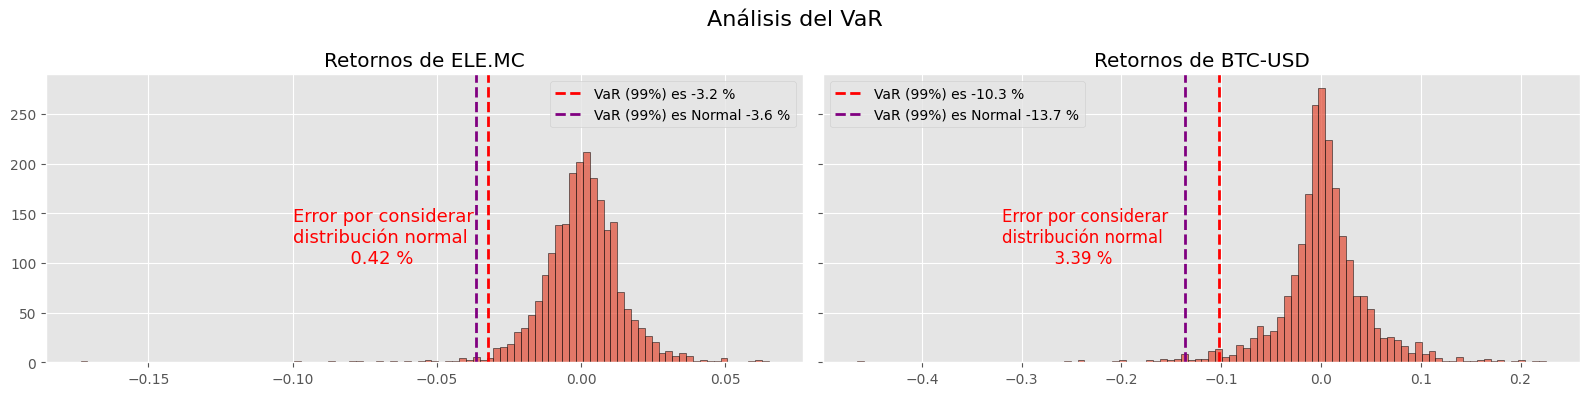

In [22]:
# 3. Hacemos la gráfica para dos activos cuyas distribuciones de los retornos NO se parece a la normal ELE-MC y BTC-USD

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=-var_99_gauss['ELE.MC'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['ELE.MC']:.1f} %")
axes[0].axvline(x=-var_99_hist['ELE.MC'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['ELE.MC']:.1f} %")
axes[0].text(-0.10, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(-var_99_gauss['ELE.MC']--var_99_hist['ELE.MC']):.2f} %", fontsize=13, color='RED')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['BTC-USD'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=-var_99_gauss['BTC-USD'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_hist['BTC-USD'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['BTC-USD']:.1f} %")
axes[1].text(-0.32, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(-var_99_gauss['BTC-USD']--var_99_hist['BTC-USD']):.2f} %", fontsize=12, color='RED')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de BTC-USD')
axes[1].legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

Es decir, cometemos un **error al calcular el riesgo del 0.42% y 3.39%**, respectivamente, al asumir que los retornos siguen una distribución normal.

### VaR por simulaciones de Montecarlo


La simulación de Monte Carlo se utiliza para predecir posibles retornos futuros de un activo generando múltiples escenarios basados en un modelo de los retornos, que incluye factores como la media y la volatilidad. Este método crea series de tiempo aleatorias de los retornos futuros, calcula los valores futuros del activo para cada serie y analiza la distribución de estos valores para evaluar el riesgo y el potencial de rendimiento. Es una herramienta flexible que permite a inversores y analistas considerar la incertidumbre y tomar decisiones más informadas.

La simulación de Monte Carlo se divide en dos enfoques principales: el paramétrico y el histórico. 

- El **paramétrico** utiliza distribuciones estadísticas basadas en parámetros (como la media y desviación estándar) para modelar los retornos futuros de un activo, asumiendo una distribución conocida.

- El **histórico** emplea directamente datos de retornos pasados para simular futuros posibles, sin asumir una distribución específica, reflejando más fielmente el comportamiento real del mercado. 

**VaR PARAMÉTRICO POR MONTECARLO**

Los pasos para calcularlo son:

1. Descargar los datos históricos del activo.
   
2. Calcular los retornos logarítmicos o simples de los datos.
   
3. Calcular la media y desviación estándar de los retornos.
   
4. Generar los retornos futuros utilizando una distribución normal con la media y desviación estándar calculadas.
   
5. Generar las series de precios futuros del activo a partir de los retornos futuros simulados.

6. Calcular el VaR con las simulaciones


In [23]:
# Número de días
n_days = 252
#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

mu_btc = retornos['BTC-USD'].iloc[:n_days].mean()
sigma_btc = retornos['BTC-USD'].iloc[:n_days].std()

#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

In [24]:
# Crear un generador de números aleatorios
rng = np.random.default_rng(seed=42)

# Generar números aleatorios siguiendo una distribución normal
ret_sim = rng.normal(loc=mu_btc, scale=sigma_btc, size= (n_days, n_sim))

In [25]:
#Calculamos los precios simulados
ret_cum_sim = ret_sim.cumsum(axis=0)
btc_ret_sim = precios['BTC-USD'].iloc[0] * np.exp(ret_cum_sim)

In [26]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*precios['BTC-USD'].iloc[0]

#Concatenamos la fila inicial con los precios simulados
btc_precios_sim = np.concatenate((fila_0, btc_ret_sim), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
btc_precios_sim_df = pd.DataFrame(btc_precios_sim, index=precios.index[:n_days+1], columns=range(n_sim))

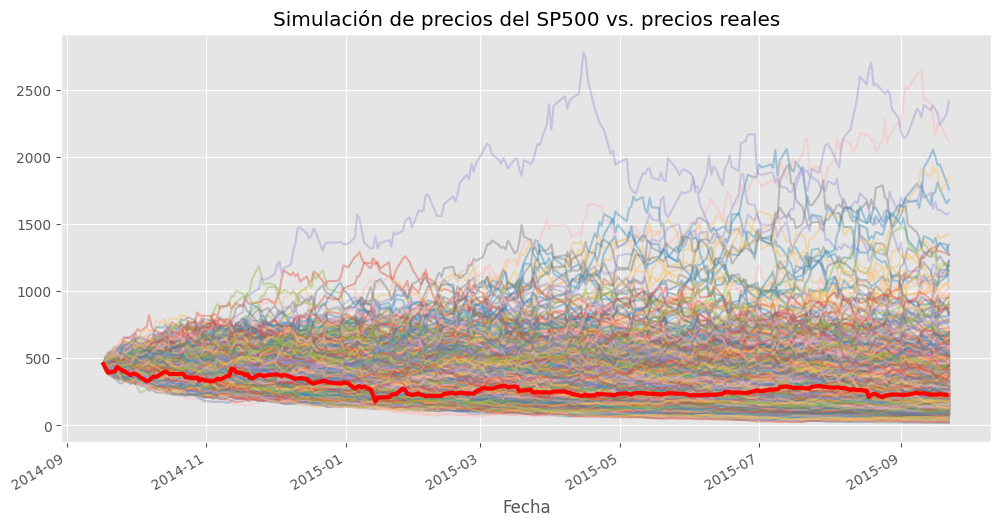

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
btc_precios_sim_df.plot(legend=False, alpha=0.4, ax=ax) #Graficamos los precios simulados
precios['BTC-USD'].iloc[:n_days].plot(ax=ax, color='red', linewidth=3, legend=False) #Graficamos los precios reales
plt.title('Simulación de precios del SP500 vs. precios reales')
plt.xlabel('Fecha')
plt.show()

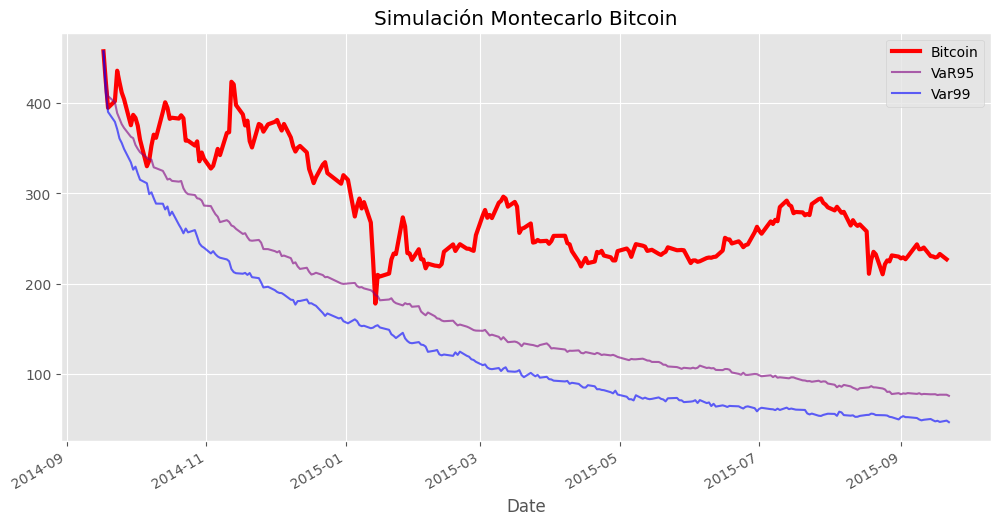

In [28]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol = btc_precios_sim_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol.columns = ['VaR99', 'VaR95']

#Hacemos la gráfica
fig, ax = plt.subplots(figsize=(12,6))
precios['BTC-USD'].iloc[:n_days].plot(ax=ax, color='red', linewidth=3)
precios_quantile_evol.loc[:, 'VaR95'].plot(ax=ax, color='purple',  alpha=0.6)
precios_quantile_evol.loc[:, 'VaR99'].plot(ax=ax, color='blue',  alpha=0.6)
plt.legend(['Bitcoin', 'VaR95', 'Var99'])
plt.title('Simulación Montecarlo Bitcoin')
plt.show()

In [29]:
# Cuantos días el precio está por debajo del percentil 5
dias_bajo_percentil_5 = (precios['BTC-USD'].iloc[:n_days+1].values < precios_quantile_evol.loc[:, 'VaR95']).sum()
dias_bajo_percentil_5

4

Veamoa ahora lo que ocurre si usamos los datos del año 2017 para simular los precios del año 2018:

In [30]:
precios_btc_2017 = precios['BTC-USD'].loc['2017']
precios_btc_2018 = precios['BTC-USD'].loc['2018']

retornos_btc_2017 = np.log(precios_btc_2017).diff().dropna()
retornos_btc_2018 = np.log(precios_btc_2018).diff().dropna()


In [31]:
# Número de días
n_days = precios_btc_2018.shape[0]-1
#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

mu_btc = retornos_btc_2017.mean()
sigma_btc = retornos_btc_2017.std()


In [32]:
# Crear un generador de números aleatorios
rng = np.random.default_rng(seed=42)

# Generar números aleatorios siguiendo una distribución normal
ret_sim = rng.normal(loc=mu_btc, scale=sigma_btc, size= (n_days, n_sim))

In [33]:
#Calculamos los precios simulados
ret_cum_sim = ret_sim.cumsum(axis=0)
btc_ret_sim = precios_btc_2018.iloc[0] * np.exp(ret_cum_sim)

In [34]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*precios_btc_2018.iloc[0]

#Concatenamos la fila inicial con los precios simulados
btc_precios_sim = np.concatenate((fila_0, btc_ret_sim), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
btc_precios_sim_df = pd.DataFrame(btc_precios_sim, index=precios_btc_2018.index[:n_days+1], columns=range(n_sim))

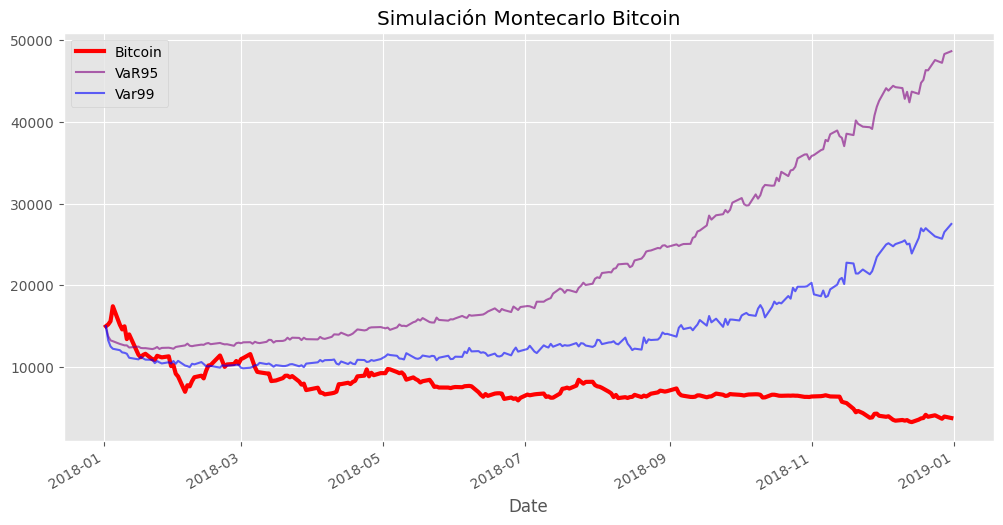

In [35]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol = btc_precios_sim_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol.columns = ['VaR99', 'VaR95']

#Hacemos la gráfica
fig, ax = plt.subplots(figsize=(12,6))
precios_btc_2018.plot(ax=ax, color='red', linewidth=3)
precios_quantile_evol.loc[:, 'VaR95'].plot(ax=ax, color='purple',  alpha=0.6)
precios_quantile_evol.loc[:, 'VaR99'].plot(ax=ax, color='blue',  alpha=0.6)
plt.legend(['Bitcoin', 'VaR95', 'Var99'])
plt.title('Simulación Montecarlo Bitcoin')
plt.show()

**¿Cómo puede ser que los precios reales estén por debajo del Var99?**

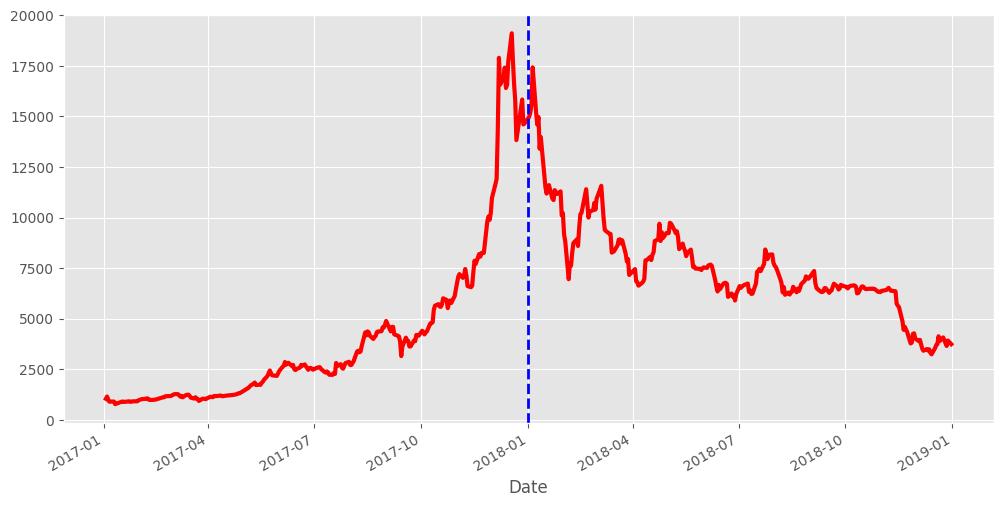

In [32]:
precios['BTC-USD'].loc['2017':'2018'].plot(figsize=(12, 6), color='red', linewidth=3)
plt.axvline(x='2018-01-01', color='blue', linestyle='--', linewidth=2)

**VaR HISTÓTRICO POR MONTECARLO**

Los pasos para calcularlo son:

1. Descargar los datos históricos del activo.
   
2. Calcular los retornos logarítmicos o simples de los datos.
   
3. Generar los retornos futuros utilizando retornos históricos.

4. Calcular los precios futuros usando los retornos
   
4. Calcular el VaR con los precios del último día.

In [36]:

# Número de días
n_days = 252
#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

mu_btc = retornos['BTC-USD'].iloc[:n_days].mean()
sigma_btc = retornos['BTC-USD'].iloc[:n_days].std()

#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

In [37]:
# Crear un generador de números aleatorios
rng = np.random.default_rng(seed=42)

ret_sim_choice = rng.choice(retornos['BTC-USD'].iloc[:n_days], size=(n_days, n_sim), replace=True)

In [38]:
#Calculamos los precios simulados
ret_cum_sim_choice = ret_sim_choice.cumsum(axis=0)
btc_ret_sim_choice  = precios['BTC-USD'].iloc[0] * np.exp(ret_cum_sim_choice )

In [39]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*precios['BTC-USD'].iloc[0]

#Concatenamos la fila inicial con los precios simulados
btc_precios_sim_choice  = np.concatenate((fila_0, btc_ret_sim_choice ), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
btc_precios_sim_choice_df = pd.DataFrame(btc_precios_sim_choice , index=precios.index[:n_days+1], columns=range(n_sim))

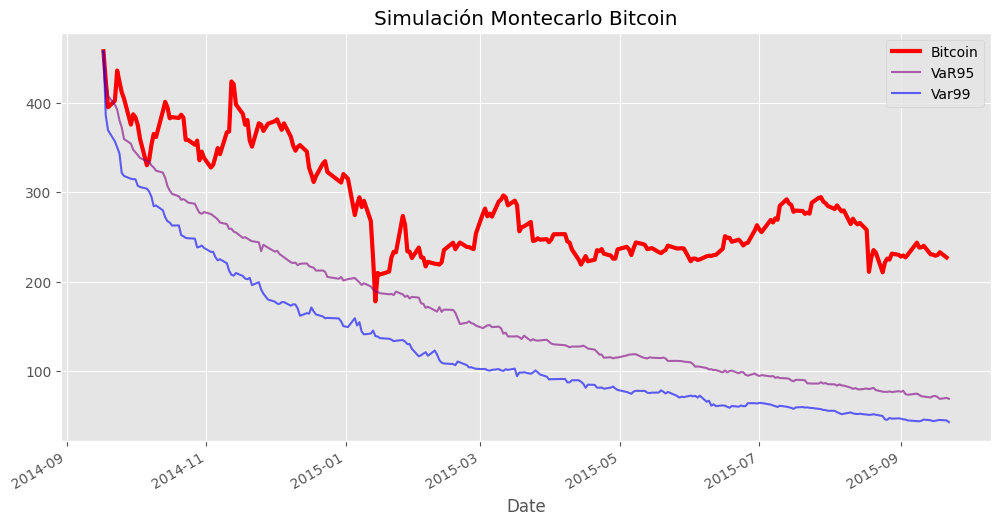

In [40]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol_choice = btc_precios_sim_choice_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol_choice.columns = ['VaR99', 'VaR95']

#Hacemos la gráfica
fig, ax = plt.subplots(figsize=(12,6))
precios['BTC-USD'].iloc[:n_days].plot(ax=ax, color='red', linewidth=3)
precios_quantile_evol_choice.loc[:, 'VaR95'].plot(ax=ax, color='purple',  alpha=0.6)
precios_quantile_evol_choice.loc[:, 'VaR99'].plot(ax=ax, color='blue',  alpha=0.6)
plt.legend(['Bitcoin', 'VaR95', 'Var99'])
plt.title('Simulación Montecarlo Bitcoin')
plt.show()

In [55]:
# Cuantos días el precio está por debajo del percentil 5
dias_bajo_percentil_5 = (precios['BTC-USD'].iloc[:n_days+1].values < precios_quantile_evol_choice.loc[:, 'VaR99']).sum()
dias_bajo_percentil_5

0

El principal problema del Valor en Riesgo (VaR) es que no considera la distribución de las pérdidas que superan el umbral del VaR, es decir, no ofrece información sobre la magnitud de las pérdidas extremas.
Soluciones propuestas incluyen:
*  La **extensión de Cornish-Fisher**, que ajusta el VaR para tener en cuenta el sesgo y la curtosis de la distribución de retornos
  
*  Otras medidas como el **CVaR** (Valor en Riesgo Condicional) o **EVaR** (Valor en Riesgo Esperado) Estas medidas ofrecen una visión más completa al calcular el promedio de las pérdidas que exceden el VaR, es decir, consideran lo que sucede en la cola de la distribución de pérdidas más allá del punto del VaR



### Extensión de Cornish-Fisher del VaR Parmétrico [paper original](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15229/1/148.pdf)

La expansión de Cornish-Fisher es un método matemático usado para ajustar el cálculo del Valor en Riesgo (VaR) tomando en cuenta la asimetría (sesgo) y la curtosis (medida de colas pesadas o ligeras) de la distribución de retornos de un activo o cartera. Tradicionalmente, el VaR asume una distribución normal de los retornos, lo que puede no ser realista para muchos activos financieros que muestran comportamientos de riesgo más complejos.

El cálculo del Valor en Riesgo (VaR) utilizando la expansión de Cornish-Fisher modifica la z-score normal estándar para ajustarse a la asimetría (sesgo) y kurtosis (curtosis) de la distribución de rendimientos. La idea es corregir la aproximación normal estándar del VaR para reflejar la forma real de la distribución de los rendimientos, especialmente en las colas.

Aquí está la fórmula matemática para calcular el z-score ajustado:

$$ z_{\text{ajustado}} = z + \frac{1}{6}(z^2 - 1)S + \frac{1}{24}(z^3 - 3z)K - \frac{1}{36}(2z^3 - 5z)S^2 $$

donde:
- $ z $ es el z-score normal estándar correspondiente al nivel de confianza del VaR (por ejemplo, -1.645 para el 95% de confianza).
- $ S $ es el coeficiente de asimetría de la distribución de rendimientos.
- $ K $ es el exceso de kurtosis de la distribución de rendimientos.

Una vez calculado el $ z_{\text{ajustado}} $, se puede utilizar para calcular el VaR ajustado por Cornish-Fisher como sigue:

$$ \text{VaR}_{\text{ajustado}} = \mu + z_{\text{ajustado}} \sigma $$

donde:
- $ \mu $ es el promedio de los rendimientos.
- $ \sigma $ es la desviación estándar de los rendimientos.

Este método proporciona un VaR que tiene en cuenta la forma real de la distribución de los rendimientos, ofreciendo una medida más precisa del riesgo en distribuciones no normales.


Vamos a calcular los VaR modificados para un activo con retornos "que se parecen a una distribución normla" como es IEF y otro que no como es el Bitcoin

In [43]:
mu_IEF = means ['IEF']
mu_BTC = means ['BTC-USD']

std_IEF = stds ['IEF']
std_BTC = stds ['BTC-USD']

skew_IEF = skew(retornos['IEF'])
skew_BTC = skew(retornos['BTC-USD'])

kurt_IEF = kurtosis(retornos['IEF'])
kurt_BTC = kurtosis(retornos['BTC-USD'])

In [46]:
z_95 = 1.65
z_99 = 2.33

z_IEF_ajustado_95 = z_95 + 1/6*(z_95**2 - 1) * skew_IEF + 1/24*(z_95**3 - 3*z_95) * kurt_IEF - 1/36* (2*z_95**3 - 5*z_95) * skew_IEF**2
z_IEF_ajustado_99 = z_99 + 1/6*(z_99**2 - 1) * skew_IEF + 1/24*(z_99**3 - 3*z_99) * kurt_IEF - 1/36* (2*z_99**3 - 5*z_99) * skew_IEF**2

z_BTC_ajustado_95 = z_95 + 1/6*(z_95**2 - 1) * skew_BTC + 1/24*(z_95**3 - 3*z_95) * kurt_BTC - 1/36* (2*z_95**3 - 5*z_95) * skew_BTC**2
z_BTC_ajustado_99 = z_99 + 1/6*(z_99**2 - 1) * skew_BTC + 1/24*(z_99**3 - 3*z_99) * kurt_BTC - 1/36* (2*z_99**3 - 5*z_99) * skew_BTC**2


In [61]:
var_95_IEF_ajus = mu_IEF + std_IEF * z_IEF_ajustado_95

print(f"El VaR 95 de IEF es {100*var_95_gauss['IEF']:.3f} y el VaR 95 ajustado es {100*var_95_IEF_ajus:.3f}")


El VaR 95 de IEF es 0.682 y el VaR 95 ajustado es 0.675


In [55]:
var_99_IEF_ajus = mu_IEF + std_IEF * z_IEF_ajustado_99
print(f"El VaR 99 de IEF es {100*var_99_gauss['IEF']:.2f} y el VaR 99 ajustado es {100*var_99_IEF_ajus:.2f}")

(0.009649193993325917, 0.013487714225766901)

In [67]:
var_95_gauss['BTC-USD']

0.07205341977824695

In [69]:
var_95_BTC_ajus = mu_BTC + std_BTC * z_BTC_ajustado_95

print(f"El VaR 95 de BTC es {100*var_95_gauss['BTC-USD']:.3f} y el VaR 95 ajustado es {100*var_95_BTC_ajus:.3f}")


El VaR 95 de BTC es 7.205 y el VaR 95 ajustado es 5.938


In [70]:
var_99_BTC_ajus = mu_BTC + std_BTC * z_BTC_ajustado_99

print(f"El VaR 99 de BTC es {100*var_99_gauss['BTC-USD']:.3f} y el VaR 99 ajustado es {100*var_99_BTC_ajus:.3f}")

El VaR 99 de BTC es 10.266 y el VaR 99 ajustado es 17.271


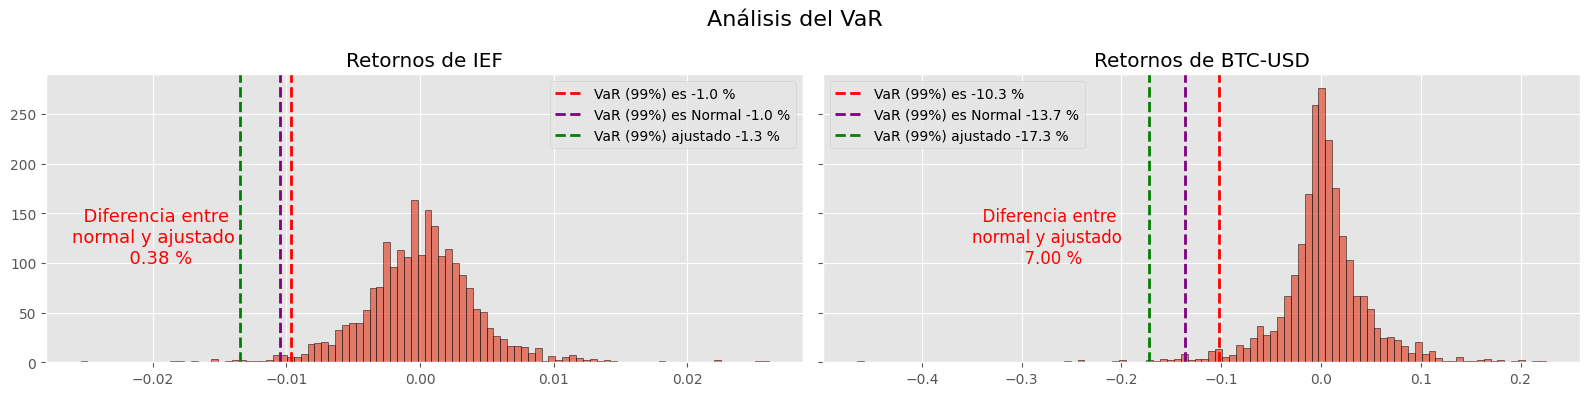

In [90]:
# 3. Hacemos la gráfica para dos activos cuyas distribuciones de los retornos NO se parece a la normal ELE-MC y BTC-USD

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=-var_99_gauss['IEF'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['IEF']:.1f} %")
axes[0].axvline(x=-var_99_hist['IEF'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['IEF']:.1f} %")
axes[0].axvline(x=-var_99_IEF_ajus, color='green', linestyle='--', linewidth=2, label=f"VaR (99%) ajustado {100 * -var_99_IEF_ajus:.1f} %")
axes[0].text(-0.026, 100, f"  Diferencia entre\nnormal y ajustado\n          {100 *np.abs(-var_99_gauss['IEF']--var_99_IEF_ajus):.2f} %", fontsize=13, color='RED')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de IEF')
axes[0].legend()

axes[1].hist(retornos['BTC-USD'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=-var_99_gauss['BTC-USD'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_hist['BTC-USD'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_BTC_ajus, color='green', linestyle='--', linewidth=2, label=f"VaR (99%) ajustado {100 * -var_99_BTC_ajus:.1f} %")
axes[1].text(-0.35, 100, f"  Diferencia entre\nnormal y ajustado\n          {100 *np.abs(-var_99_gauss['BTC-USD']--var_99_BTC_ajus):.2f} %", fontsize=12, color='RED')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de BTC-USD')
axes[1].legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

___

## CVaR

+ El VaR tiene un problema: no considera cómo son los retornos que están por debajo del VaR. Es decir, dos activos pueden tener el mismo VaR pero uno puede tener retornos muy negativos y el otro no.

+ Para solucionar este problema se usa el CVaR o Conditional Value at Risk. El CVaR es la **media de los retornos que están por debajo del VaR**.

<center>
    <img src="../imgs/CVaR.PNG"  alt="drawing" width="500">
</center>

En términos más prácticos, el CVaR responde a la pregunta: **"Si la pérdida supera el VaR, ¿cuánto esperamos perder en promedio?"**

In [91]:
# Calcular el CVAR al 95%
cvar_95_ele = np.mean(retornos['ELE.MC'][retornos['ELE.MC'] < var_95_gauss['ELE.MC']])
cvar_95_ief = np.mean(retornos['IEF'][retornos['IEF'] < var_95_gauss['IEF']])

#Calcular el CVAR al 99%
cvar_99_ele = np.mean(retornos['ELE.MC'][retornos['ELE.MC'] < var_99_gauss['ELE.MC']])
cvar_99_ief = np.mean(retornos['IEF'][retornos['IEF'] < var_99_gauss['IEF']])

## CORREGIR GRÁFICAS Y VER SI CVAR 95 > Cvar 99

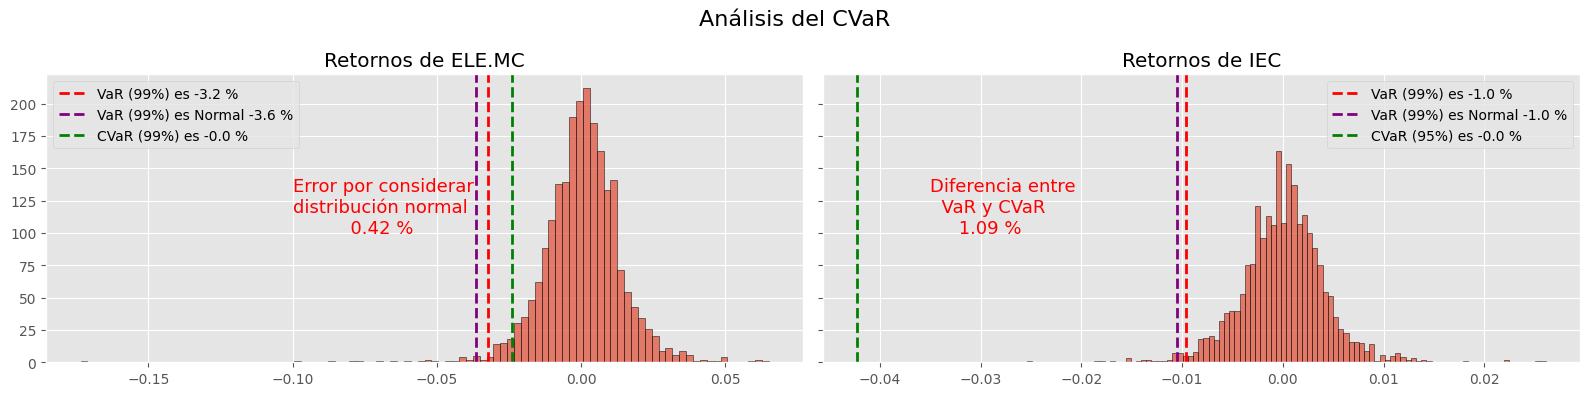

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=-var_99_gauss['ELE.MC'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['ELE.MC']:.1f} %")
axes[0].axvline(x=-var_99_hist['ELE.MC'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['ELE.MC']:.1f} %")
axes[0].text(-0.10, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(-var_99_gauss['ELE.MC']--var_99_hist['ELE.MC']):.2f} %", fontsize=13, color='RED')
axes[0].axvline(x=100*cvar_99_ele, color='green', linestyle='--', linewidth=2, label=f'CVaR (99%) es {100 * cvar_99_ele:.1f} %')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=-var_99_gauss['IEF'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['IEF']:.1f} %")
axes[1].axvline(x=-var_99_hist['IEF'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['IEF']:.1f} %")
axes[1].text(-0.035, 100, f"Diferencia entre\n  VaR y CVaR\n     {100 *np.abs(cvar_95_ief-var_99_hist['IEF']):.2f} %", fontsize=13, color='RED')
axes[1].axvline(x=100*cvar_95_ief, color='green', linestyle='--', linewidth=2, label=f'CVaR (95%) es {100 * cvar_95_ief:.1f} %')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de IEC')
axes[1].legend()


plt.suptitle('Análisis del CVaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

### Optimización CVaR de una cartera 

In [4]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Assets todos con retornos positivos
assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ', 
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE', 
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']

#Calculamos los retornos logaritmicos
returns = np.log(prices).diff().dropna()

[*********************100%%**********************]  26 of 26 completed


In [5]:
prices.columns = assets

num_data, num_act = returns.shape

In [6]:
ret = returns.to_numpy()
retornos_esperados = returns.mean().to_numpy()
alpha = 0.05

In [5]:
pesos = cp.Variable(num_act)
t = cp.Variable()
ui = cp.Variable(num_data)

riesgo = t + cp.sum(ui)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [6]:
restricciones = [
    -ret @ pesos - t - ui <= 0,
    ui >= 0,
    cp.sum(pesos) == 1,
    pesos >= 0,
]

In [7]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()


0.016182673912765545

In [8]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
pesos_ajustados

array([0.   , 0.007, 0.071, 0.013, 0.027, 0.085, 0.   , 0.   , 0.   ,
       0.   , 0.015, 0.   , 0.   , 0.011, 0.144, 0.027, 0.064, 0.   ,
       0.244, 0.   , 0.033, 0.038, 0.   , 0.   , 0.221, 0.   ])

In [9]:
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

In [10]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

Calcula la cartera que minimice el CVaR y que no invierta más de 10% en un único activo

In [28]:
pesos = cp.Variable(num_act)
t = cp.Variable()
ui = cp.Variable(num_data)

riesgo = t + cp.sum(ui)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [27]:
retornos_esperados.mean(), retornos_esperados.max(), retornos_esperados.min()

(0.0003219262579043891, 0.000858851887217026, -0.0006238559922886828)

In [33]:
restricciones = [
    -ret @ pesos - t - ui <= 0,
    ui >= 0,
    cp.sum(pesos) == 1,
    pesos >= 0,
    pesos <= 0.1,    
]

In [34]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()

0.016669897599214

In [35]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

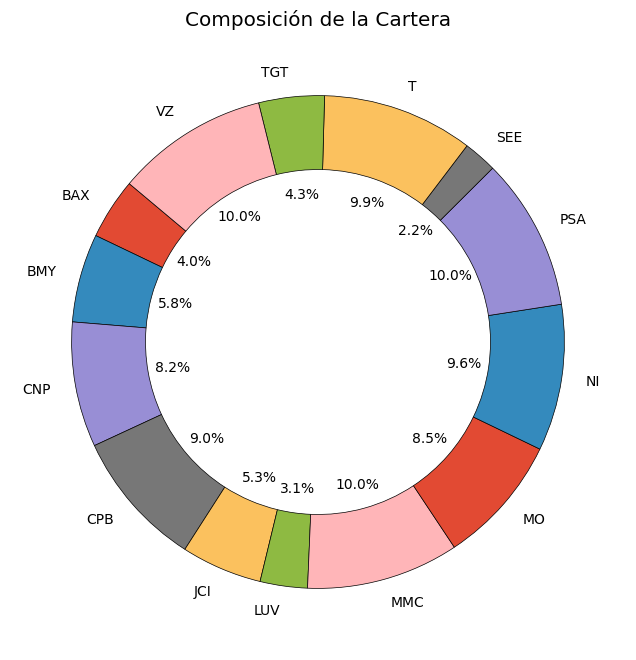

In [36]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

### EJEMPLO OPTIMIZACIÓN MÚLTIPLES MEDIDAS DE RIESGOS

In [27]:
# Date range
start = '2018-01-01'
end = '2022-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
prices = yf.download(assets, start = start, end = end)
prices = prices.loc[:,('Adj Close', slice(None))]
prices.columns = assets

returns = prices.pct_change().dropna()

[*********************100%%**********************]  25 of 25 completed


In [28]:
prices.columns = assets

num_data, num_act = returns.shape

In [33]:
matriz_cov = returns.cov().to_numpy()
retornos_esperados = returns.mean().to_numpy()
alpha = 0.05
ret = returns.to_numpy()


pesos = cp.Variable(num_act)
g = cp.Variable(nonneg=True) 
t = cp.Variable()
ui = cp.Variable(num_data)

riesgo1 = g # Desviación estándar

riesgo2 = t + cp.sum(ui)/(alpha * num_data) # CVaR

retornos = retornos_esperados.T @ pesos

In [34]:
cvar_restricciones = [
    -ret @ pesos - t - ui <= 0,
    ui >= 0,
    cp.sum(pesos) == 1,
    pesos >= 0,]

std_restricciones = [cp.SOC(g, sqrtm(matriz_cov) @ pesos)]

restricciones = [pesos >= 0,
                 cp.sum(pesos) == 1,]

restricciones_riesgos = [riesgo1 <= 0.035,
                        riesgo2 <= 0.08]

restricciones += cvar_restricciones + std_restricciones + restricciones_riesgos

In [38]:
objective = cp.Maximize(retornos * 1000)
prob = cp.Problem(objective, restricciones)
prob.solve(solver='MOSEK')

weights = pd.DataFrame(pesos.value, index=assets)
#print(weights)
w_ = weights.to_numpy()
# Standard Deviation
print("Std. Dev.:",((w_.T @ matriz_cov @ w_)**0.5).item())
# CVaR
print("CVaR:", rp.CVaR_Hist(ret @ pesos.value, alpha))

Std. Dev.: 0.035000000050326836
CVaR: 0.07498858132139269


___

## Maximum Drawdown

El drawdown es una medida de riesgo que refleja la máxima caída desde un pico hasta un valle en el valor de una inversión antes de alcanzar un nuevo máximo.

Esta métrica es esencial para entender la volatilidad y el riesgo real asociado a una estrategia de inversión.

A continuación, vamos a explorar algunos ejemplos de condiciones comerciales que se pueden establecer en relación con el drawdown, ilustrando su importancia en la gestión del riesgo:

* Es improbable la aceptación de un drawdown del 50%.
* Criterio de terminación: drawdown del 20%.
* Umbral de alerta: drawdown del 15%.
* Máximo período tolerado bajo el nivel de referencia: 1 año.

Max Drawdown es una medida del riesgo en las finanzas que nos ayuda a entender cuánto se puede perder en una inversión o cartera en el peor momento antes de que empiece a recuperarse. Para calcularlo:

1. **Encuentra el punto más alto**: Identifica el valor máximo alcanzado por la inversión hasta un cierto instante de tiempo.

2. **Encuentra el punto más bajo mientras no se supere el máximo**: Desde el punto más alto encontrado en el paso 1, busca el valor más bajo que alcanzó la inversión mientras no se haya superado ese máximo. Este valor más bajo representa la mayor caída o drawdown.

3. **Calcula el drawdown máximo**: Resta el valor más bajo del punto más alto encontrado en el paso 1. El resultado es el drawdown máximo

4. **Reinicia el cálculo después de superar el punto más alto**: Después de que el valor de la inversión supere el punto más alto anterior (el máximo registrado), comienza un nuevo cálculo de drawdown máximo. Esto significa que cualquier pérdida anterior se considera parte del drawdown pasado, y se inicia un nuevo registro del drawdown a partir del nuevo punto más alto.

El drawdown máximo evoluciona a medida que la inversión alcanza nuevos máximos. 

Vamos a calcular el Max Drawdown de un activo.

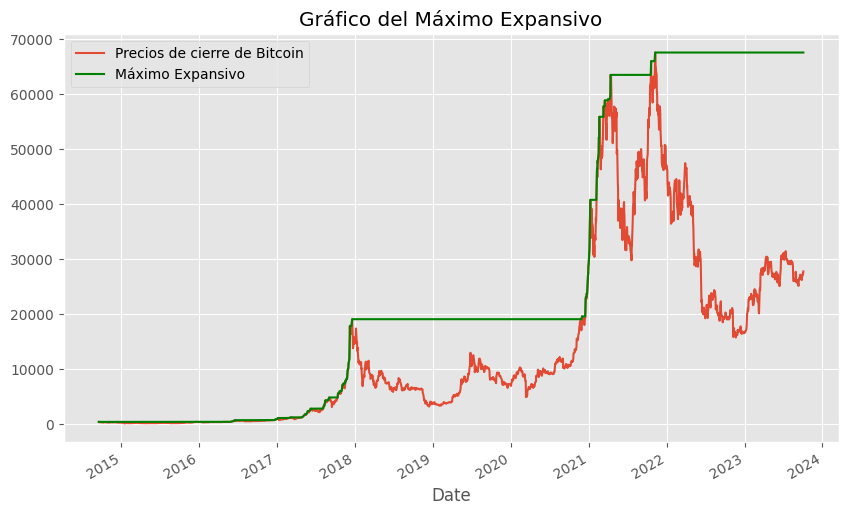

In [29]:
expanding_max = precios["BTC-USD"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 6))

precios["BTC-USD"].plot(label='Precios de cierre de Bitcoin');
expanding_max.plot(label='Máximo Expansivo', color='green');
plt.legend()
plt.title('Gráfico del Máximo Expansivo')
plt.show()

Ahora calculo el drawdown máximo de cada activo siguiendo la formula:

$$Drawdown = \frac{P_t - P_{max}}{P_{max}} = \frac{P_t}{P_{max}}-1$$

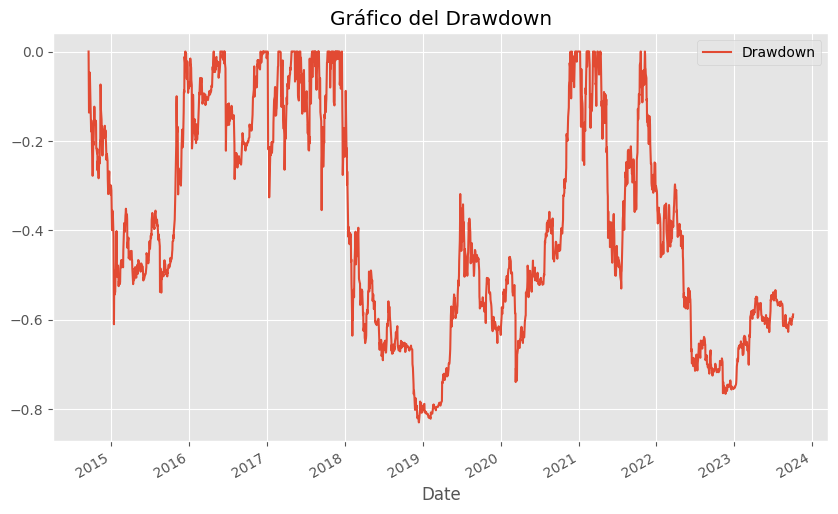

In [31]:
drawdown = precios["BTC-USD"] / expanding_max - 1
drawdown.plot(label = 'Drawdown', figsize=(10, 6));
plt.legend()
plt.title('Gráfico del Drawdown');

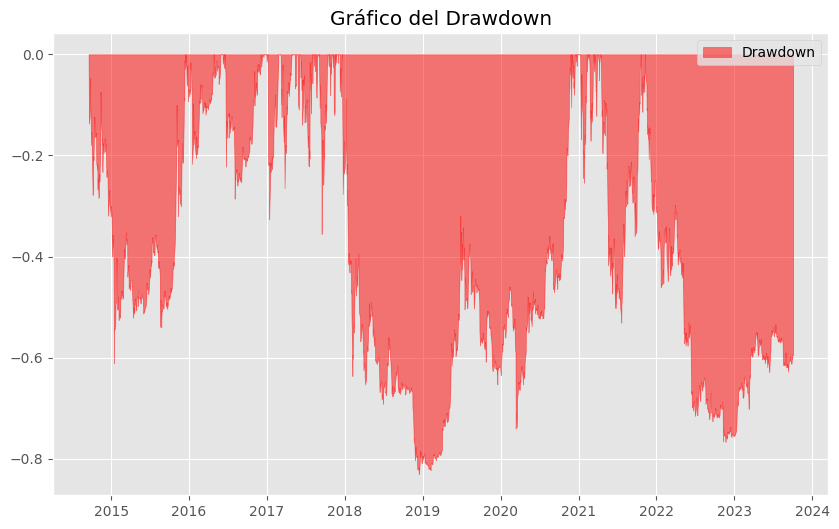

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.fill_between(precios["BTC-USD"].index.values, drawdown, label='Drawdown', color='red', alpha=0.5);

plt.legend()
plt.title('Gráfico del Drawdown');

### Optimización CDaR de una cartera 

In [37]:
pesos = cp.Variable(num_act)
t = cp.Variable()
uj = cp.Variable(num_data)
dj = cp.Variable(num_data+1)

riesgo = t + cp.sum(uj)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [46]:
restricciones = [dj[1:] - t - uj <= 0,
                dj[1:] >= dj[:-1] - ret @ pesos,
                uj >= 0,
                dj >= 0,
                dj[0] == 0,
                cp.sum(pesos) == 1,
                pesos >= 0,
#                retornos >= 0.0007,
            ]

In [43]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()

0.08313172563268321

In [44]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

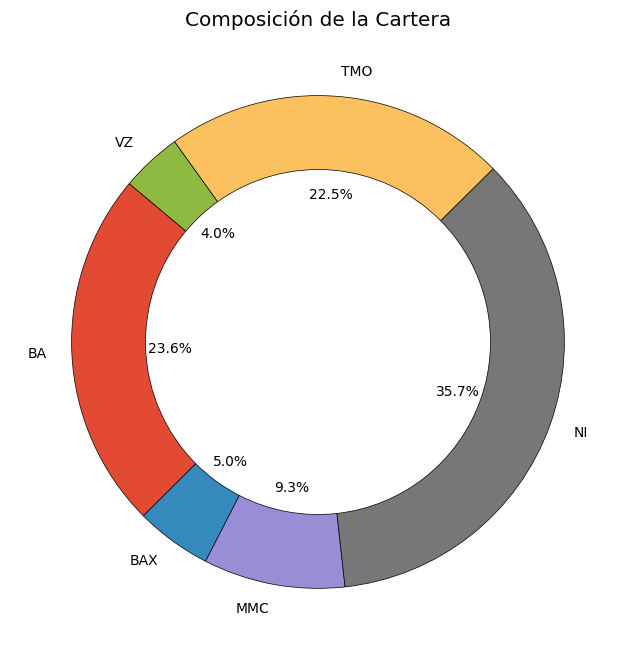

In [45]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()